In [8]:
%matplotlib inline
import networkx as nx, numpy as np, matplotlib.pyplot as plt, scipy.optimize as so
from pulp import *
plt.rcParams['figure.figsize'] = (6, 2)
plt.rcParams['font.family'] = 'Microsoft JhengHei'

###BPR関数


In [3]:
def bpr(x, c=1, a=0.48, b=2.82):
    return 1 + a * pow(x / c, b)

In [4]:
a = np.linspace(0, 3)

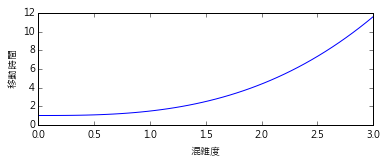

In [11]:
plt.xlabel('混雑度')
plt.ylabel('移動時間')
plt.plot(a, bpr(a))

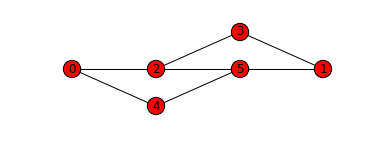

In [13]:
g = nx.Graph() # ネットワーク
g.add_edges_from([(0, 2), (2, 3), (3, 1), (2, 5), (0, 4), (4, 5), (5, 1)])
pos = {0:(0, 1), 1:(3, 1), 2:(1, 1), 3:(2, 2), 4:(1, 0), 5:(2, 1)}
nx.draw_networkx_labels(g, pos, labels={i:i for i in range(6)})
nx.draw(g, pos)

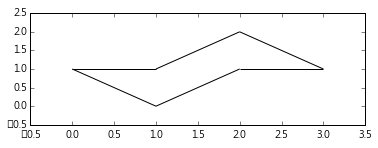

In [15]:
for i, j in g.edges():
    g.adj[i][j]['capacity'] = 1
r = nx.max_flow_min_cost(g, 0, 1)
nx.draw_networkx_edges(g, pos, [(i, j) for i in r for j, v in r[i].items() if v]); None

In [113]:
[(i, j, v) for i in r for j, v in r[i].items() if v]

[(0, 2, 1), (0, 4, 1), (2, 3, 1), (3, 1, 1), (4, 5, 1), (5, 1, 1)]

In [16]:
g.edges()

[(0, 2), (0, 4), (1, 3), (1, 5), (2, 3), (2, 5), (4, 5)]

In [48]:
def objfunc(x):
    return sum(bpr(x)) - (x[0] + x[1]) * 10
eq = [lambda x: x[0] - x[4] - x[5],
      lambda x: x[4] - x[2],
      lambda x: x[1] - x[6],
      lambda x: x[5] + x[6] - x[3]]
r = so.fmin_slsqp(objfunc, [0] * 7, eqcons=eq, iter=100, iprint=1)
r

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -15.1585152992
            Iterations: 6
            Function evaluations: 57
            Gradient evaluations: 6


array([ 1.99659619,  1.43674679,  1.43674663,  1.99659634,  1.43674663,
        0.55984956,  1.43674679])

[ 1.99659619  1.43674679  1.43674663  1.99659634  1.43674663  0.55984956
  1.43674679]


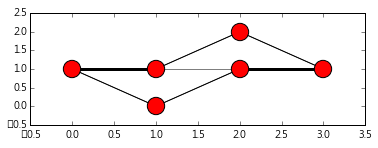

In [64]:
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, [g.edges()[i] for i, f in enumerate(r) if f > 0.1], width=0.5)
nx.draw_networkx_edges(g, pos, [g.edges()[i] for i, f in enumerate(r) if f > 1], width=1)
nx.draw_networkx_edges(g, pos, [g.edges()[i] for i, f in enumerate(r) if f > 1.8], width=3)
print(r)

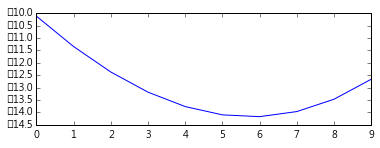

In [72]:
rr = np.linspace(1, 2, 10)
plt.plot([objfunc(np.array([1,1,1,1,1,0,1]) * i) for i in rr])